# CUSTOMER SEGMENTATION WITH K-MEANS CLUSTERING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set_style("white")

In [3]:
df = pd.read_csv("dataset/mall_customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
rename_col = {"Annual Income (k$)": "Income", 
              "Spending Score (1-100)": "Spending"}
df = df.rename(columns=rename_col)

# 1. EDA

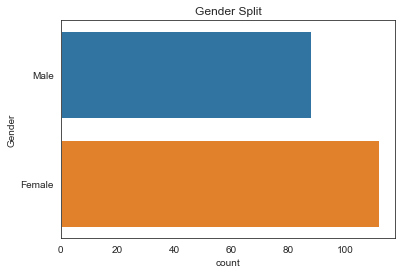

In [7]:
sns.countplot(data=df,
              y="Gender");
plt.title("Gender Split");

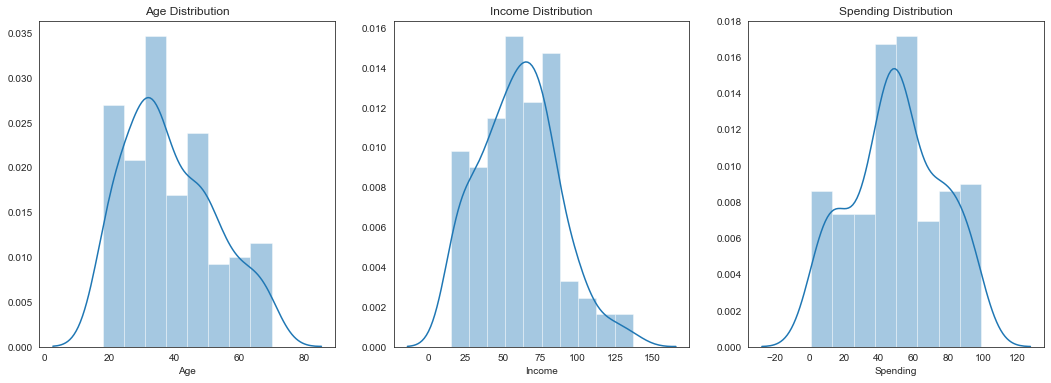

In [8]:
fig, ax = plt.subplots(nrows=1,
                       ncols=3,
                       figsize=(18,6));

sns.distplot(df["Age"],
             ax=ax[0]);
ax[0].set_title("Age Distribution");

sns.distplot(df["Income"],
             ax=ax[1]);
ax[1].set_title("Income Distribution");

sns.distplot(df["Spending"],
             ax=ax[2]);
ax[2].set_title("Spending Distribution");

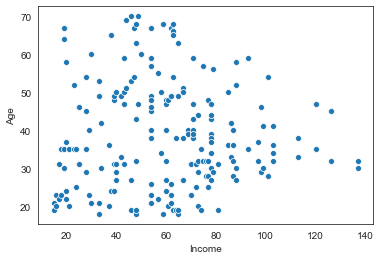

In [9]:
sns.scatterplot(data=df,
                x="Income", 
                y="Age");

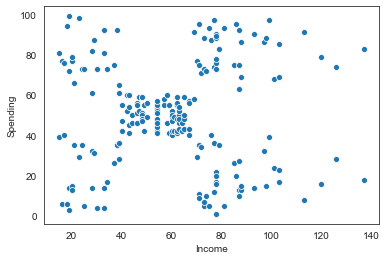

In [10]:
sns.scatterplot(data=df,
                x="Income", 
                y="Spending");

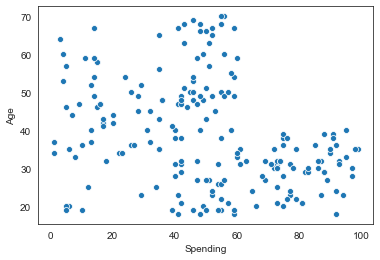

In [11]:
sns.scatterplot(data=df,
                x="Spending", 
                y="Age");

# 2. K-Means Clustering

In [12]:
from sklearn.cluster import KMeans

In [13]:
X = df[["Age", "Spending"]]
clusters = KMeans(n_clusters=3)
clusters.fit(X)

KMeans(n_clusters=3)

In [14]:
clusters.predict(X)

array([2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [15]:
#just an example, not saving
X.assign(cluster=clusters.predict(X))

,Age,Spending,cluster
0,19,39,2
1,21,81,1
2,20,6,0
3,23,77,1
4,31,40,2
...,...,...,...
195,35,79,1
196,45,28,0
197,32,74,1
198,32,18,0


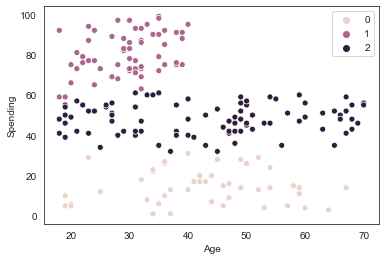

In [16]:
sns.scatterplot(data=X,
                x="Age",
                y="Spending", 
                hue=clusters.predict(X));

In [17]:
a,b = X.columns

In [18]:
a

'Age'

In [19]:
b

'Spending'

In [20]:
def cluster_2d(X, n=3):
    cluster= KMeans(n_clusters=n, n_init=1)
    cluster.fit(X)
    
    x,y = X.columns
    sns.scatterplot(data=X,
                x=x,
                y=y, 
                hue=cluster.predict(X),
                palette="colorblind");
    print(f"Inertia: {cluster.inertia_}")

Inertia: 45840.67661610871


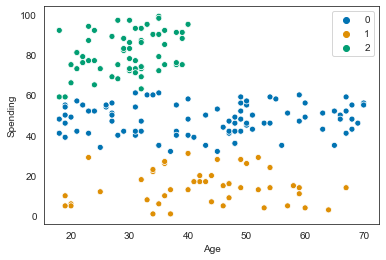

In [21]:
cluster_2d(X)

Inertia: 44448.45544793369


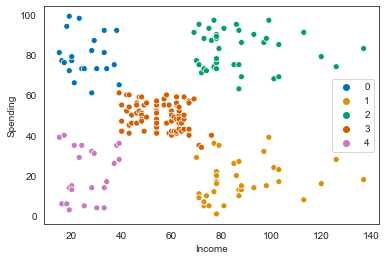

In [22]:
X1 = df[["Income", "Spending"]]
cluster_2d(X1, n=5)